# 使用gridspec与其它函数自定义子图布局
如何创建栅格型的组合子图轴坐标。

- subplots()
    
    Perhaps the primary function used to create figures and axes. It's also similar to matplotlib.pyplot.subplot(), but creates and places all axes on the figure at once. See also matplotlib.figure.Figure.subplots.
    
    或许是用于创建子图与轴坐标的最主要函数。与matplotlib.pyplot.subplot()类似，但是其一次在图上创建并放置所有的轴坐标。参考matplotlib.figure.Figure.subplots.
- GridSpec
    
    Specifies the geometry of the grid that a subplot will be placed. The number of rows and number of columns of the grid need to be set. Optionally, the subplot layout parameters (e.g., left, right, etc.) can be tuned.
    
    指定子图被放置的网格几何样式。需要设置网格的行与列数量。可选的，子图布局参数可被调节。
- SubplotSpec
    
    Specifies the location of the subplot in the given GridSpec.
    
    在给定的GridSpec中指定子图位置。
- subplot2grid()
    
    A helper function that is similar to subplot(), but uses 0-based indexing and let subplot to occupy multiple cells. This function is not covered in this tutorial.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## 基本快速入门指南

首先我们用2个例子演示如何使用subplots()与gridspec创建一个基本的2x2网格。

使用subplots()非常简单。其返回值是一个Figure实例和一组Axes对象。

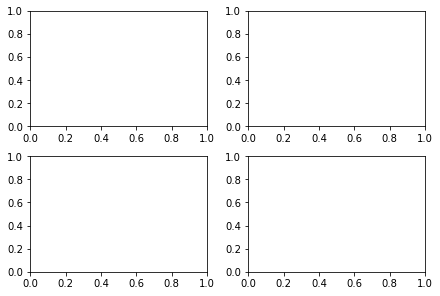

In [2]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)

对于这样简单的用例，gridspec就显得有点啰嗦了。首先要分别创建figure和GridSpec的实例，之后将gridspec实例的元素传递给add_subplot()方法用于创建axes对象。通常，以与numpy数组相同的方式访问gridspec的元素。

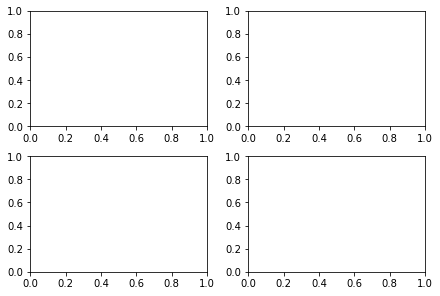

In [3]:
fig2 = plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[1, 0])
f2_ax4 = fig2.add_subplot(spec2[1, 1])

The power of gridspec comes in being able to create subplots that span rows and columns. Note the Numpy slice syntax for selecting the part of the gridspec each subplot will occupy.

gridspec的能力在于能够创建跨越行与列的子图。每个子图所占用的gridspec部分使用Numpy slice语法选择。

Note that we have also used the convenience method Figure.add_gridspec instead of gridspec.GridSpec, potentially saving the user an import, and keeping the namespace cleaner.

一个更便捷的方法Figure.add_gridspec可以替代gridspec.GridSpec

Text(0.5, 1.0, 'gs[-1, -2]')

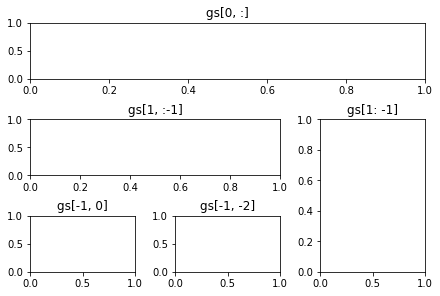

In [7]:
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(3, 3)
f3_ax1 = fig3.add_subplot(gs[0, :])    #第一行，第一列至最后一列
f3_ax1.set_title('gs[0, :]')
f3_ax2 = fig3.add_subplot(gs[1, :-1])  #第二行，第一列至倒数第二列
f3_ax2.set_title('gs[1, :-1]')
f3_ax3 = fig3.add_subplot(gs[1:, -1])  #第二行至最后一行，倒数第一列
f3_ax3.set_title('gs[1: -1]')
f3_ax4 = fig3.add_subplot(gs[-1, 0])   #倒数第一行，第一列
f3_ax4.set_title('gs[-1, 0]')
f3_ax5 = fig3.add_subplot(gs[-1, -2])  #倒数第一行，倒数第二列
f3_ax5.set_title('gs[-1, -2]')

在以不同宽度创建子图的几种方法中gridspec也是必须的。

The method shown here is similar to the one above and initializes a uniform grid specification, and then uses numpy indexing and slices to allocate multiple "cells" for a given subplot.

Another option is to use the width_ratios and height_ratios parameters. These keyword arguments are lists of numbers. Note that absolute values are meaningless, only their relative ratios matter. That means that width_ratios=[2, 4, 8] is equivalent to width_ratios=[1, 2, 4] within equally wide figures. For the sake of demonstration, we'll blindly create the axes within for loops since we won't need them later.

另一个选择是使用width_ratios与height_ratios参数。这些子参数是数值列表。请注意，绝对值是没有意义的，只有它们的相对比率才重要。意思是在相同宽度的图形中width_ratios=[2, 4, 8]与width_ratios=[1, 2, 4]相同。为了演示起见，我们将在for循环中随便创建子图，因为以后将不再需要它们。